In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Amsterdam['accommodates'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['accommodates'].max()
Min = Amsterdam['accommodates'].min()
Limites = [Min, Max]
Limites

[1.0, 7.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

6.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.421645160162184

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (1.0, 7.0, 15)
intervalos

array([1.        , 1.42857143, 1.85714286, 2.28571429, 2.71428571,
       3.14285714, 3.57142857, 4.        , 4.42857143, 4.85714286,
       5.28571429, 5.71428571, 6.14285714, 6.57142857, 7.        ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Amsterdam['accommodates'] = pd.cut ( x = Amsterdam ['accommodates'], bins = intervalos, labels = categorias )
Amsterdam['accommodates']

0        Categoria5
1        Categoria3
2        Categoria3
3        Categoria5
4       Categoria12
           ...     
9654     Categoria5
9655     Categoria5
9656     Categoria7
9657     Categoria7
9658    Categoria10
Name: accommodates, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [12]:
table1 = freq_tbl(Amsterdam['accommodates'])
table1

,accommodates,frequency,percentage,cumulative_perc
0,Categoria3,5094,0.527384,0.538706
1,Categoria7,3101,0.321048,0.866646
2,Categoria5,829,0.085827,0.954315
3,Categoria12,210,0.021741,0.976523
4,Categoria10,191,0.019774,0.996722
5,Categoria14,31,0.003209,1.000000
6,Categoria1,0,0.000000,1.000000
7,Categoria2,0,0.000000,1.000000
8,Categoria4,0,0.000000,1.000000
9,Categoria6,0,0.000000,1.000000


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,accommodates,frequency
0,Categoria3,5094
1,Categoria7,3101
2,Categoria5,829
3,Categoria12,210
4,Categoria10,191
5,Categoria14,31
6,Categoria1,0
7,Categoria2,0
8,Categoria4,0
9,Categoria6,0


In [14]:
Filtro = table2[ table2['frequency'] > 31]
Filtro

,accommodates,frequency
0,Categoria3,5094
1,Categoria7,3101
2,Categoria5,829
3,Categoria12,210
4,Categoria10,191


In [15]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('accommodates')
Filtro_index

,frequency
accommodates,
Categoria3,5094
Categoria7,3101
Categoria5,829
Categoria12,210
Categoria10,191


<Axes: xlabel='accommodates'>

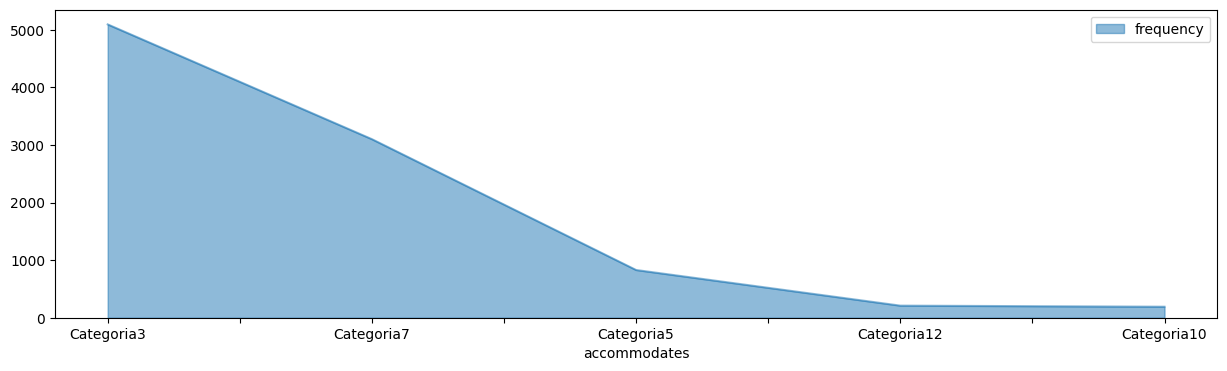

In [19]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)